Euler method:

$$
    y_{n+1} = y_n + hf(t_n, y_n)
$$

In [2]:
import numpy as np
#Euler method
fringes = [0, 100]
N = 1000
h = (fringes[1] - fringes[0])/N
t_cur = fringes[0]
y_s = []
x_s = []
f = np.cos
y = f(t_cur)
x_s.append(t_cur)
y = f(t_cur)
y_s.append(y)
t_cur = t_cur+h
while t_cur < fringes[1]:
    t_cur = t_cur+h
    x_s.append(t_cur)
    y = y + h*f(t_cur)
    y_s.append(y)

Runge-Kutta's method:

$$
    y_{n+1} = y_n + 1/6(k_1 + k_2 + k_3 + k_4)
$$

$$
    k_1 = hf(t_n,y_n)
$$

$$
    k_2 = hf(t_n + h/2, y_n + k_1/2)
$$

$$
    k_3 = hf(t_n + h/2, y_n + k_2/2)
$$

$$
    k_4 = hf(t_n + h, y_n + k_3)
$$


In [3]:
def rk(f, y, h, t):
    k_1 = h*f(t, y)
    k_2 = h*f(t + h/2, y + k_1/2)
    k_3 = h*f(t + h/2, y + k_2/2)
    k_4 = h*f(t + h, y + k_3)
    y_n_1 = y + 1/6*(k_1+k_2+k_3+k_4)
    return y_n_1

import numpy as np
#Euler method
fringes = [0, 100]
N = 1000
h = (fringes[1] - fringes[0])/N
t_cur = fringes[0]
y_s = []
x_s = []
f = np.cos
y = f(t_cur)
x_s.append(t_cur)
y = f(t_cur)
y_s.append(y)
t_cur = t_cur+h
while t_cur < fringes[1]:
    t_cur = t_cur+h
    x_s.append(t_cur)
    y = rk(f, y, h, t_cur)
    y_s.append(y)

TypeError: return arrays must be of ArrayType

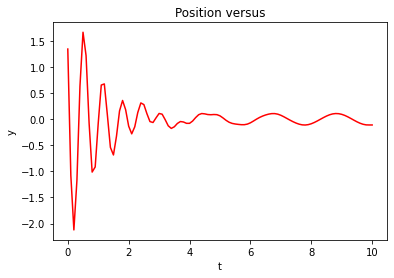

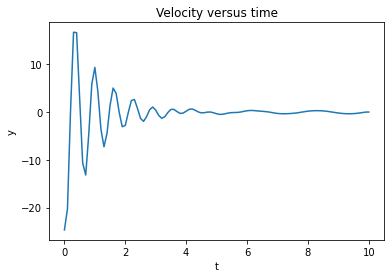

In [15]:
import numpy as np
def rk4Algor (t , h , N, y , f ) :
    k1=np.zeros(N); 
    k2=np.zeros(N)
    k3=np.zeros(N)
    k4=np.zeros(N)
    k1 = h*f(t,y)
    k2 = h*f(t+h/2.,y+k1/2.)
    k3 = h*f(t+h/2.,y+k2 /2.)
    k4 = h*f(t+h,y+k3)
    y=y+(k1+2*(k2+k3)+k4)/6.
    return y

from numpy import *
import numpy as np , matplotlib.pyplot as plt
Tstart = 0.
Tend = 10.
Nsteps = 100 # Initialization
tt =[]
yy =[]
yv =[]
y = zeros ((2),float)
y[0] = 3. 
y[1] = -5. # I n i t i a l position & velocity
t = Tstart
h = (Tend-Tstart )/Nsteps
def f (t , y) : # Force (RHS) function
    fvector = zeros ((2) , float )
    fvector [ 0 ] = y [ 1 ]
    fvector [ 1 ] = -100.*y[0] -2.*y [ 1 ] + 10.* sin (3.* t )
    return fvector
while ( t < Tend) :
    tt.append( t ) # Time loop
    if(( t + h) > Tend):
        h = Tend - t # Last step
    y = rk4Algor(t , h , 2 , y , f )
    yy.append(y [ 0 ] )
    yv.append(y [ 1 ] )
    t = t + h
fig = plt.figure ()
plt.subplot (111)
plt.plot (tt,yy,'r')
plt.title('Position versus')
plt.xlabel('t')
plt.ylabel('y')
fig1=plt.figure()
plt.subplot(111)
plt.plot ( tt , yv)
plt.title( 'Velocity versus time')
plt.xlabel ('t')
plt.ylabel ('y')
plt.show()